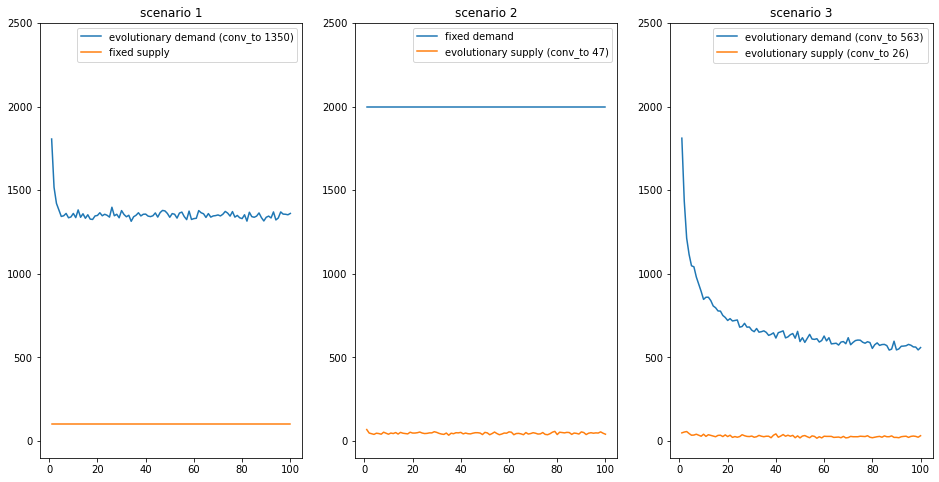

In [152]:
from statistics import mean
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

lyp = []
lyd = []
sim = simp
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0))
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0))
    
lx = [i for i in range(1,len(lyp)+1)]
sns.lineplot(x=lx, y=lyp, label = 'evolutionary demand (conv_to {})'.format(mean(lyp[90:100])), ax=ax[0])#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'fixed supply', ax=ax[0])#, marker='o')
ax[0].set_title('scenario 1')
ax[0].set_ylim([-100,2500])
y1 = lyd

lyp = []
lyd = []
sim = simd
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0))
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0))
    
lx = [i for i in range(1,len(lyp)+1)]
sns.lineplot(x=lx, y=lyp, label = 'fixed demand', ax=ax[1])#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'evolutionary supply (conv_to {})'.format(mean(lyd[90:100])), ax=ax[1])#, marker='o')
ax[1].set_title('scenario 2')
ax[1].set_ylim([-100,2500])
y2 = lyd

lyp = []
lyd = []
sim = simpd
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0))
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0))
    
lx = [i for i in range(1,len(lyp)+1)]
sns.lineplot(x=lx, y=lyp, label = 'evolutionary demand (conv_to {})'.format(mean(lyp[90:100])), ax=ax[2])#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'evolutionary supply (conv_to {})'.format(mean(lyd[90:100])), ax=ax[2])#, marker='o')
ax[2].set_title('scenario 3')
ax[2].set_ylim([-100,2500])
y3 = lyd

<AxesSubplot:>

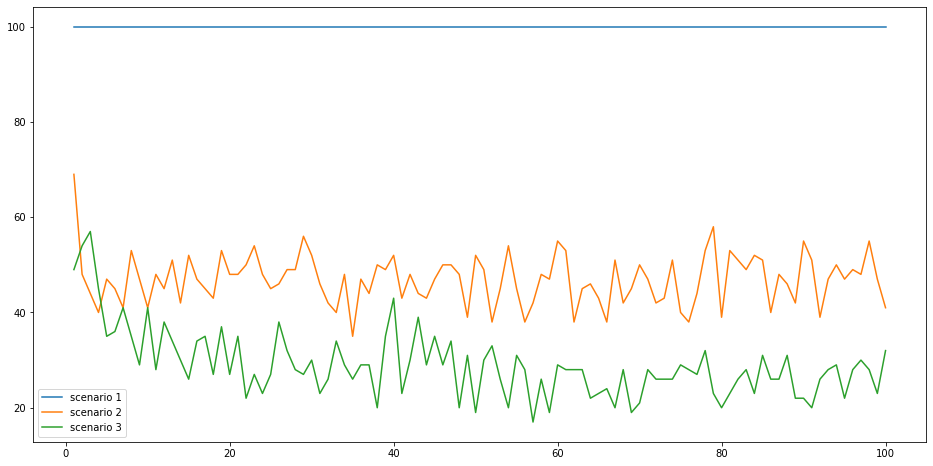

In [153]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(x=lx, y=y1, label='scenario 1')
sns.lineplot(x=lx, y=y2, label='scenario 2')
sns.lineplot(x=lx, y=y3, label='scenario 3')

<AxesSubplot:>

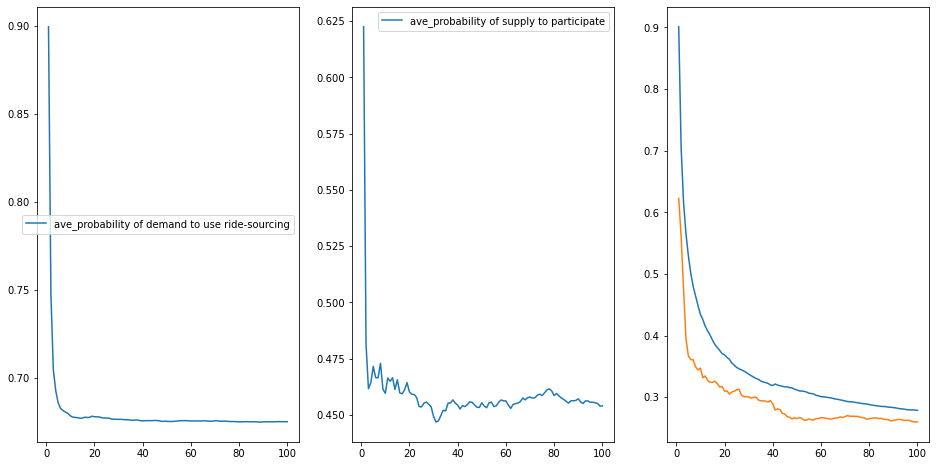

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))


sns.lineplot(x=[i for i in range(1,len(y1p)+1)], y=y1p, ax = ax[0], label='ave_probability of demand to use ride-sourcing')

sns.lineplot(x=[i for i in range(1,len(y2d)+1)], y=y2d, ax = ax[1],  label='ave_probability of supply to participate')

sns.lineplot(x=[i for i in range(1,len(y3p)+1)], y=y3p, ax = ax[2])
sns.lineplot(x=[i for i in range(1,len(y3d)+1)], y=y3d, ax = ax[2])


#ax.set_ylim([0,700])